In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_train = pd.read_csv("drive/MyDrive/data/telephone/train.csv")
df_test = pd.read_csv("drive/MyDrive/data/telephone/test.csv")
df_test, df_train

(       id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
 0       1           1043     1          1.8         1  14       0           5   
 1       2            841     1          0.5         1   4       1          61   
 2       3           1807     1          2.8         0   1       0          27   
 3       4           1546     0          0.5         1  18       1          25   
 4       5           1434     0          1.4         0  11       1          49   
 ..    ...            ...   ...          ...       ...  ..     ...         ...   
 995   996           1700     1          1.9         0   0       1          54   
 996   997            609     0          1.8         1   0       0          13   
 997   998           1185     0          1.4         0   1       1           8   
 998   999           1533     1          0.5         1   0       0          50   
 999  1000           1270     1          0.5         0   4       1          35   
 
      m_dep  m

In [4]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


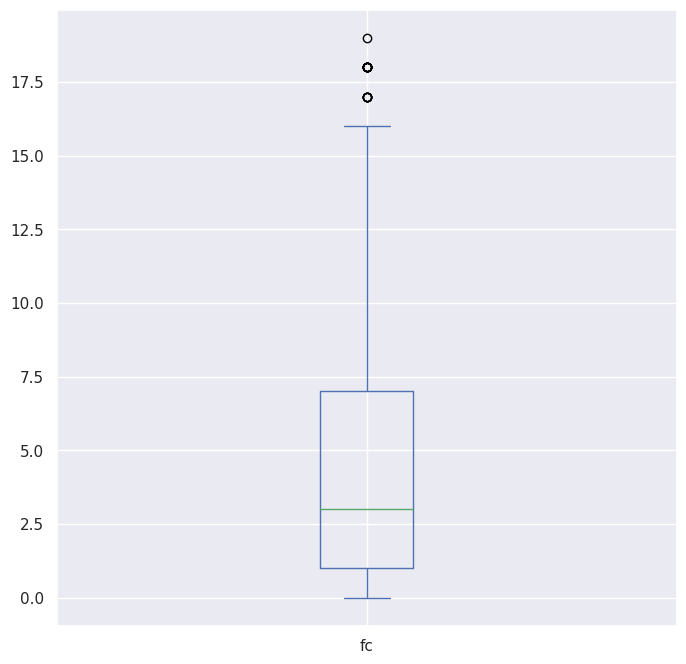

In [5]:
_, bp = df_train['fc'].plot.box(return_type='both', figsize=(8, 8))

In [6]:
outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
df_train = df_train[df_train.fc.isin(outliers) == False]
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [7]:
import missingno

In [8]:
# # матричная диаграмма пропусков
# missingno.matrix(df, figsize=(10,10), fontsize=12)

<Axes: >

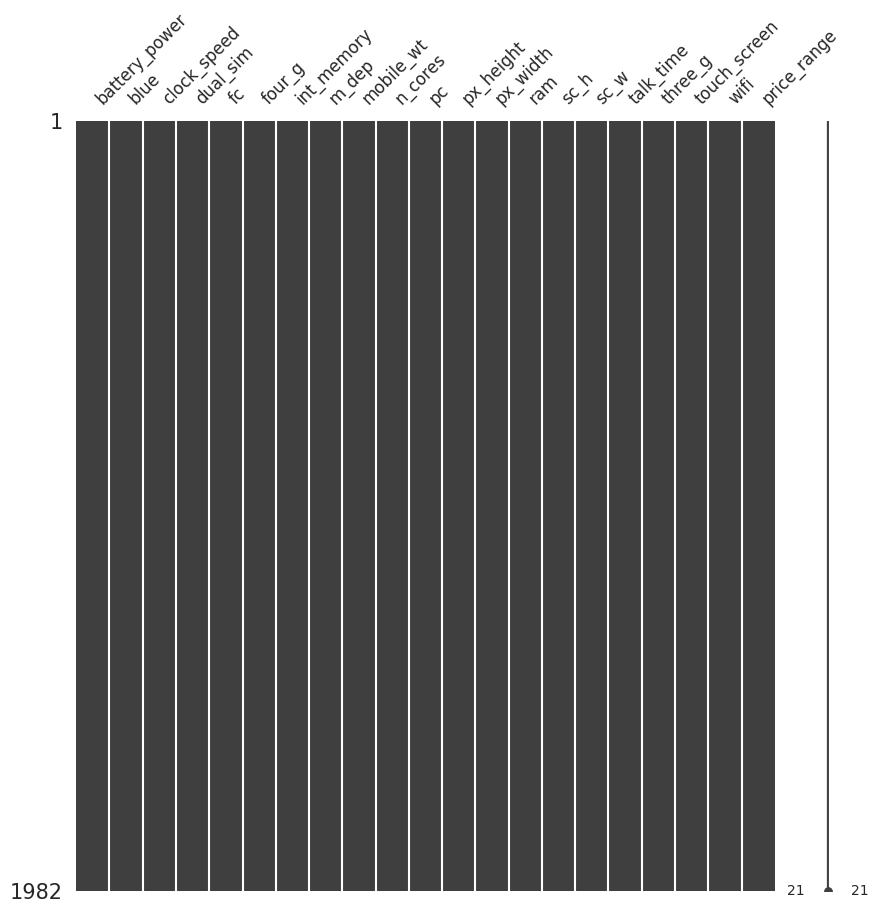

In [9]:
# # матричная диаграмма пропусков
missingno.matrix(df_train, figsize=(10,10), fontsize=12)

In [10]:
df_train.fillna(df_train.mean(), inplace=True)

<ipython-input-10-c1df2a7ee9ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.fillna(df_train.mean(), inplace=True)


In [11]:
# corr = df.corr()
# corr.style.background_gradient(cmap='RdYlGn')
# corr.style.highlight_max('Protein_(g)')
# corr.style.set_table_styles()

In [12]:
# plt.figure(figsize=(30,30))
# sns.heatmap(df.corr(), linewidths=.0, annot=True)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [14]:
clf = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=0))

In [15]:
x = df_train.drop(columns='price_range')
y = df_train['price_range']
X_train, X_test, y_train, y_test= train_test_split(x,y , test_size=0.3)

In [16]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8252100840336134

In [17]:
clf = make_pipeline(MinMaxScaler(), DecisionTreeClassifier(random_state=0))

In [18]:
x = df_train.drop(columns='price_range')
y = df_train['price_range']
X_train, X_test, y_train, y_test= train_test_split(x,y , test_size=0.3)

In [19]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8369747899159664

In [20]:
parametres = {'max_depth':[2,5],
              'min_samples_split':[2,5],
              'ccp_alpha' : [0.0, 0.5],
              'min_samples_leaf':[1, 3]}
clf = RandomizedSearchCV(DecisionTreeClassifier(), parametres)

In [21]:
search = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7949579831932773

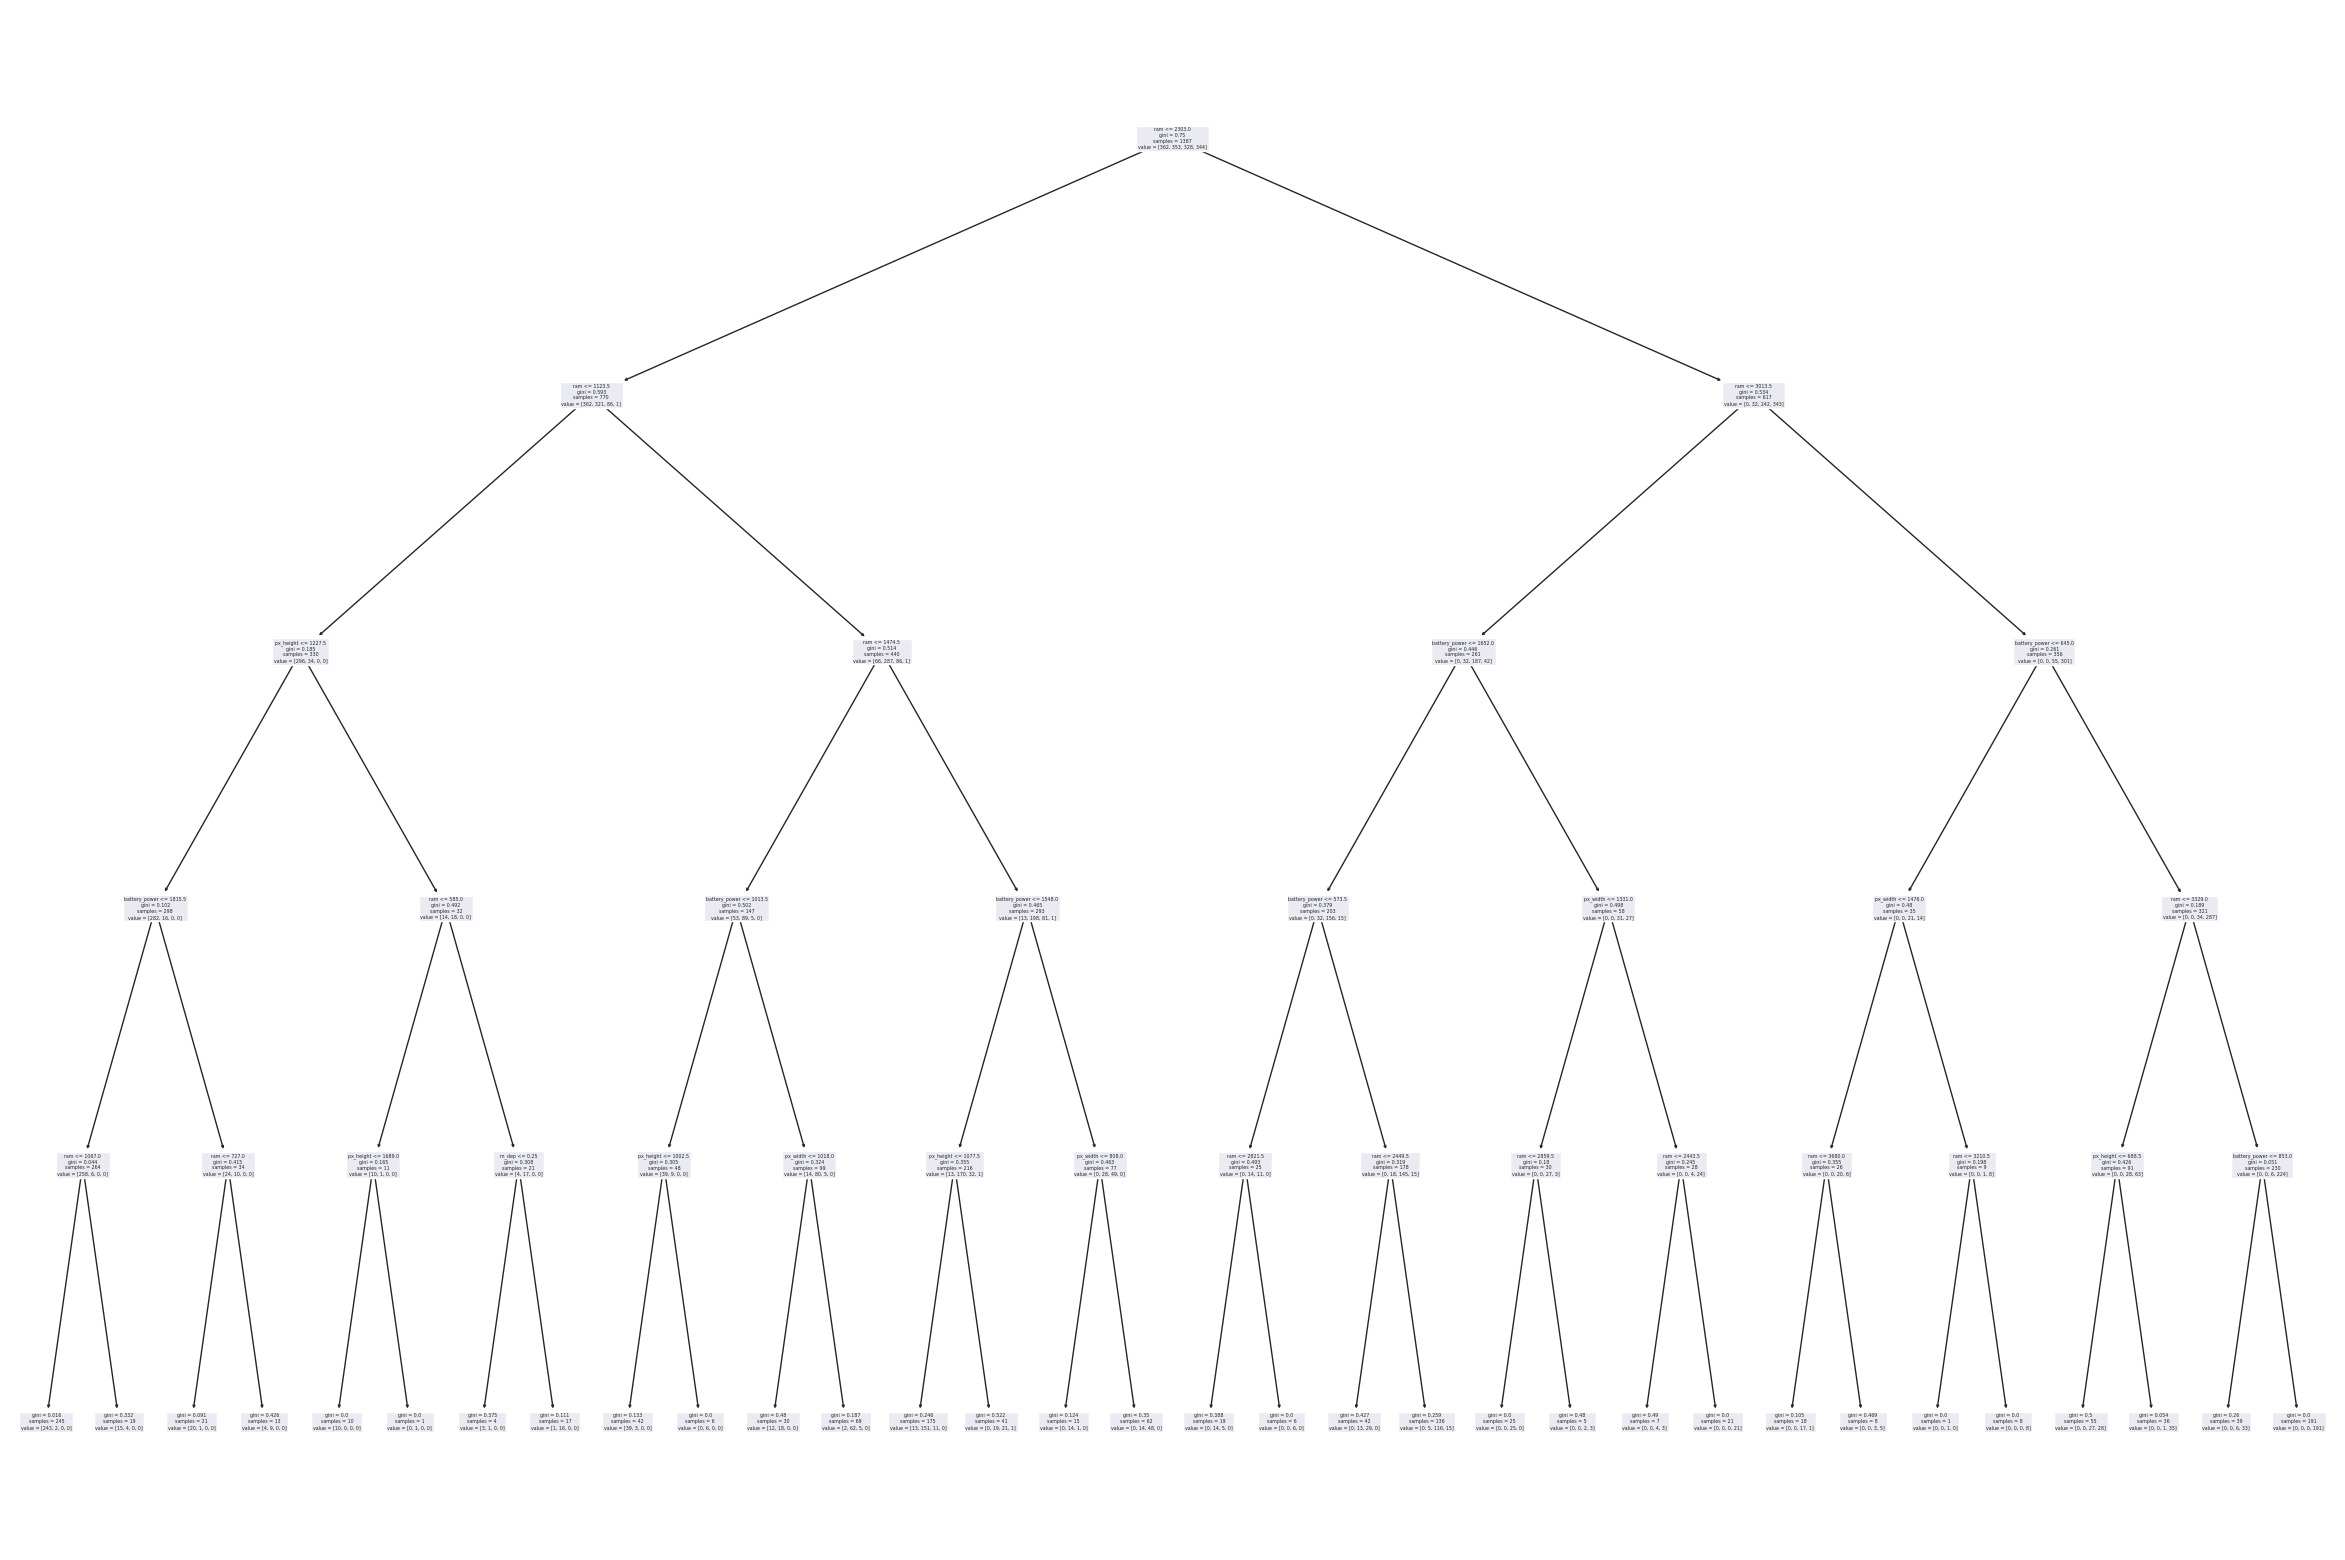

In [33]:
from sklearn import tree
clf = search.best_estimator_
plt.figure(figsize=(30, 20))
tree.plot_tree(clf, feature_names = x.columns.to_list() )
plt.show()

In [23]:
from sklearn.ensemble import  AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

In [24]:
clf = AdaBoostClassifier(n_estimators=100)
parametres = {}

In [25]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5932773109243697

In [26]:
clf =  RandomForestClassifier(n_estimators=100)
parametres = {'max_depth':[2,5],
              'min_samples_split':[2,5],
              'ccp_alpha' : [0.0, 0.5],
              'min_samples_leaf':[1, 3]}
clf = RandomizedSearchCV(clf, parametres)

In [27]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8100840336134454

In [28]:
clf =  GradientBoostingClassifier(n_estimators=100)
parametres = {'max_depth':[2,5],
              'min_samples_split':[2,5],
              'ccp_alpha' : [0.0, 0.5],
              'min_samples_leaf':[1, 3]}

In [29]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8823529411764706

In [30]:
from sklearn.tree import export_graphviz

In [31]:
sub_tree_42 = clf.estimators_[41, 0]

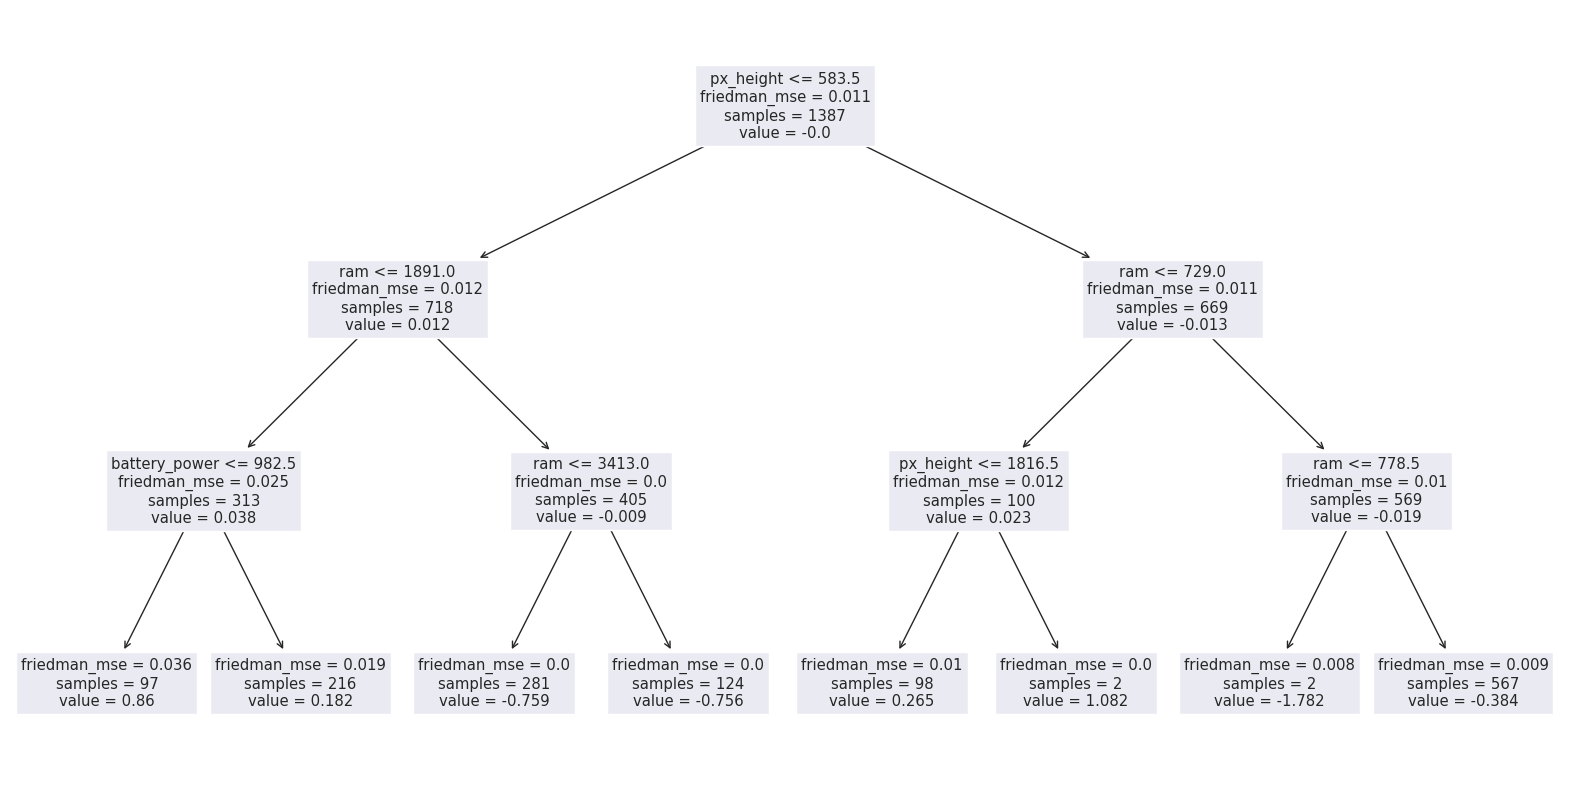

In [40]:

# # Visualization
# # Install graphviz: https://www.graphviz.org/download/
# from pydotplus import graph_from_dot_data
# from IPython.display import Image
# dot_data = export_graphviz(
#     sub_tree_42,
#     out_file=None, filled=True, rounded=True,
#     special_characters=True,
#     proportion=False, impurity=False, # enable them if you want
# )
# graph = graph_from_dot_data(dot_data)
# png = graph.create_png()
# # Save (optional)
# from pathlib import Path
# Path('./out.png').write_bytes(png)
# # Display
# Image(png)
from sklearn import tree
clf = search.best_estimator_
plt.figure(figsize=(20, 10))
tree.plot_tree(sub_tree_42, feature_names = x.columns.to_list(), class_names=y)
plt.show()